# Import Main Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
# store csv into panda
df = pd.read_csv("lyrics.csv")

In [3]:
# display panda info
df.info()
# check shape of panda
print("\n# of rows: {}".format(df.shape[0]))
print("# of columns: {}".format(df.shape[1]))
# check how data is organized
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB

# of rows: 362237
# of columns: 6


,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


# Clean Data
### Clean Data in General
There are missing data in the lyrics section with only 266557 non-null object compared to 362237 non-null objects for others.
We delete the index column as the order of the songs are not important.

In [4]:
# drop any row with missing data
df = df.dropna()
# drop column 'index'
df = df.drop('index',1)

In [5]:
# display panda info
df.info()
# check shape of data frame
print("\n# of rows: {}".format(df.shape[0]))
print("# of columns: {}".format(df.shape[1]))
# check how data is organized
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266556 entries, 0 to 362236
Data columns (total 5 columns):
song      266556 non-null object
year      266556 non-null int64
artist    266556 non-null object
genre     266556 non-null object
lyrics    266556 non-null object
dtypes: int64(1), object(4)
memory usage: 12.2+ MB

# of rows: 266556
# of columns: 5


,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


### Clean data by column 'songs'

In [6]:
# check the types of unique songs
songs = df['song'].unique()
# sort in descending order
songs.sort()
# display how many types of unique songs
print("# of unique songs: {}\n".format(len(songs)))
# print sorted array of unique songs
print(songs)

# of unique songs: 187186

['0-0' '0-0-0' '0-0-where-evil-dwells' ..., 'zzz-top' 'zzzonked' 'zzzzz']


### Clean data by column 'years'

In [7]:
# check the types of unique years
years = df['year'].unique()
# sort in descending order
years.sort()
# display how many types of unique years
print("# of unique years: {}\n".format(len(years)))
# print sorted array of unique years
print(years)

# of unique years: 51

[  67  112  702 1968 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016]


As we can see from above, there are year 67, 112, 702.
We delete these years as they are not after 1900s.

In [8]:
# delete years < 1900s
df = df[(df['year'] > 1900)]
# check the types of unique years left
years = df['year'].unique()
# sort in descending order
years.sort()
# display how many types of unique years
print("# of unique years: {}\n".format(len(years)))
# print sorted array of unique years
print(years)

# of unique years: 48

[1968 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]


### Clean data by column 'artist'

In [9]:
# check the types of unique artists
artists = df['artist'].unique()
# sort in descending order
artists.sort()
# display how many types of unique artists
print("# of unique artists: {}\n".format(len(artists)))
# print sorted array of unique artists
print(artists)

# of unique artists: 14543

['009-sound-system' '047' '0510' ..., 'the-graveyard-boulevard'
 'the-great-flood-catastrophe' 'ykforward-russia']


### Clean data by column 'genre'

In [10]:
# check the types of unique genre
genres = df['genre'].unique()
# sort in descending order
genres.sort()
# display how many types of unique genres
print("# of unique genre: {}\n".format(len(genres)))
# print sorted array of unique genres
print(genres)

# of unique genre: 12

['Country' 'Electronic' 'Folk' 'Hip-Hop' 'Indie' 'Jazz' 'Metal'
 'Not Available' 'Other' 'Pop' 'R&B' 'Rock']


As we can see above, we have genre 'Not Available' and 'Other'.
To simplify, we delete them out of the data set.

In [11]:
# delete genres 'Not Available' and 'Other'
df = df[(df['genre'] != 'Not Available') & (df['genre'] != 'Other')]
# check how many types of unique genres left
genres = df['genre'].unique()
# sort in descending order
genres.sort()
# display how many types of unique genres
print("# of unique genres: {}\n".format(len(genres)))
# print sorted array of unique genres
print(genres)

# of unique genres: 10

['Country' 'Electronic' 'Folk' 'Hip-Hop' 'Indie' 'Jazz' 'Metal' 'Pop' 'R&B'
 'Rock']


### Clean data by column 'lyrics'

In [12]:
# check lyrics data
df['lyrics'].head()

0    Oh baby, how you doing?\nYou know I'm gonna cu...
1    playin' everything so easy,\nit's like you see...
2    If you search\nFor tenderness\nIt isn't hard t...
3    Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...
4    Party the people, the people the party it's po...
Name: lyrics, dtype: object

In [13]:
# Replace all \n with space
df = df.replace({'\n':' '}, regex=True)

In [14]:
# check how data changed
df['lyrics'].head()

0    Oh baby, how you doing? You know I'm gonna cut...
1    playin' everything so easy, it's like you seem...
2    If you search For tenderness It isn't hard to ...
3    Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...
4    Party the people, the people the party it's po...
Name: lyrics, dtype: object

In [15]:
# count the words in each song
df['word_count'] = df['lyrics'].str.split().str.len()
df.head()

,song,year,artist,genre,lyrics,word_count
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",433
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",258
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,170
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",522
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312


In [16]:
# check some statistic based on word counts grouped by genre
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14387.0,186.086397,82.999049,1.0,128.0,171.0,231.0,1366.0
Electronic,7966.0,193.376475,138.816594,1.0,100.0,170.0,260.0,1920.0
Folk,2243.0,181.037004,120.616688,1.0,111.0,168.0,238.0,2393.0
Hip-Hop,24845.0,489.983256,238.632524,1.0,340.0,485.0,629.0,8195.0
Indie,3149.0,196.854239,108.375014,1.0,126.0,183.0,248.0,1262.0
Jazz,7970.0,172.067252,97.430118,1.0,108.0,152.0,215.0,1040.0
Metal,23759.0,169.068774,112.809568,1.0,100.0,152.0,217.0,2423.0
Pop,40465.0,245.741629,128.699888,1.0,157.0,224.0,311.0,1704.0
R&B,3401.0,224.931785,120.049328,1.0,142.0,204.0,281.0,1440.0


It's odd that there are songs with 1 word from the min section of every genre.
Let's check what they are.

In [17]:
# display the top songs with 1 word
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] == 1])))
df.loc[df['word_count'] == 1].head()

# of songs with 1 word: 3212


,song,year,artist,genre,lyrics,word_count
420,dying-sun,2011,demonaz,Metal,[Instrumental],1
1410,curtain-call,2011,brandi-carlile,Country,INSTRUMENTAL,1
1710,mary-mheaigi-s-frank-mors-the-trip-to-lerwick,2007,andy-m-stewart,Folk,Instrumental,1
1733,treorachadh,2007,andy-m-stewart,Folk,Instrumental,1
1841,providence,2007,dreadful-shadows,Rock,[Instrumental],1


The 1-worded songs are mostly instrumental.
Let's delete them from the data set as they essentially don't have lyrics.

In [18]:
# delete songs with 1 word
df = df[df['word_count'] != 1]
# review data
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14323.0,186.913426,82.254845,3.0,129.0,171.0,231.00,1366.0
Electronic,7620.0,202.111680,135.602990,2.0,110.0,177.0,264.00,1920.0
Folk,2108.0,192.566888,115.198695,4.0,121.0,175.0,244.00,2393.0
Hip-Hop,24760.0,491.661914,237.312650,2.0,341.0,486.0,629.25,8195.0
Indie,3104.0,199.693621,106.541654,3.0,128.0,184.0,249.00,1262.0
Jazz,7825.0,175.237188,95.478588,2.0,110.0,153.0,216.00,1040.0
Metal,22995.0,174.652794,110.359008,2.0,105.0,155.0,220.00,2423.0
Pop,40262.0,246.975610,127.842247,2.0,158.0,225.0,311.00,1704.0
R&B,3391.0,225.592156,119.607676,2.0,142.0,204.0,281.50,1440.0


There are still some songs with 2, 3 words.
Let's check them if they have lyrics.

In [19]:
# display the top songs with 2 words
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] == 2])))
df.loc[df['word_count'] == 2].head()

# of songs with 1 word: 186


,song,year,artist,genre,lyrics,word_count
2735,terminal,2007,antimatter,Rock,[Patterson] [instrumental],2
3751,instinct,2007,claire-voyant,Pop,Tekst niedostę,2
4089,democracy,2007,disbelief,Metal,[Killing Joke-Cover],2
9170,niaaea,2006,adaaeaaineay-iaidiia,Rock,- .,2
9173,odaiaae,2006,adaaeaaineay-iaidiia,Rock,- ...,2


In [20]:
# display the top songs with 3 words
print("# of songs with 3 words: {}".format(len(df.loc[df['word_count'] == 3])))
df.loc[df['word_count']  == 3].head()

# of songs with 3 words: 198


,song,year,artist,genre,lyrics,word_count
2688,enhorabuena,2014,el-arrebato,Pop,El Arrebato Enhorabuena,3
5803,because-you-acute-re-mine,2006,bryan-ferry,Rock,Because you're mine,3
7509,wickedness-act,2007,celesty,Metal,[Japanese Bonus Track],3
7639,malice,2001,behemoth,Metal,[Lyrics not available],3
9164,edaniue-niao,2006,adaaeaaineay-iaidiia,Rock,", , ,",3


In [21]:
# display the top songs with 3 words
print("# of songs with 3 words: {}".format(len(df.loc[df['word_count'] < 50])))

# of songs with 3 words: 6825


In [22]:
# check the proportion of songs with less 100 words compared to the entire data set
print("# of songs < 50 words: {}".format(len(df[df['word_count'] < 50])))
print("# of total songs: {}".format(len(df)))
print("% of songs < 50 words: {}%".format(len(df[df['word_count'] < 50])/len(df)*100))

# of songs < 50 words: 6825
# of total songs: 234208
% of songs < 50 words: 2.914076376554174%


Since we are only eliminating about 3% of the entire data set by deleting songs less than 50 words, we will do this to simplify the data set.

In [23]:
# delete songs with 1 word
df = df[df['word_count'] > 50]
# review data
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14204.0,188.253520,81.267609,51.0,130.0,172.0,231.0,1366.0
Electronic,6993.0,217.772344,130.525636,51.0,126.0,190.0,273.0,1920.0
Folk,2018.0,199.837463,112.317991,51.0,129.0,179.0,247.0,2393.0
Hip-Hop,24186.0,502.707682,228.881699,51.0,353.0,492.0,634.0,8195.0
Indie,3030.0,203.797360,104.489909,52.0,133.0,186.5,251.0,1262.0
Jazz,7675.0,178.039609,94.238820,51.0,112.0,156.0,218.0,1040.0
Metal,21603.0,184.207286,106.957901,51.0,114.0,161.0,225.0,2423.0
Pop,39623.0,250.486182,125.807910,51.0,161.0,227.0,313.0,1704.0
R&B,3350.0,227.995522,118.323421,52.0,144.0,205.0,282.0,1440.0


Let's now check the overall distribution of the songs.

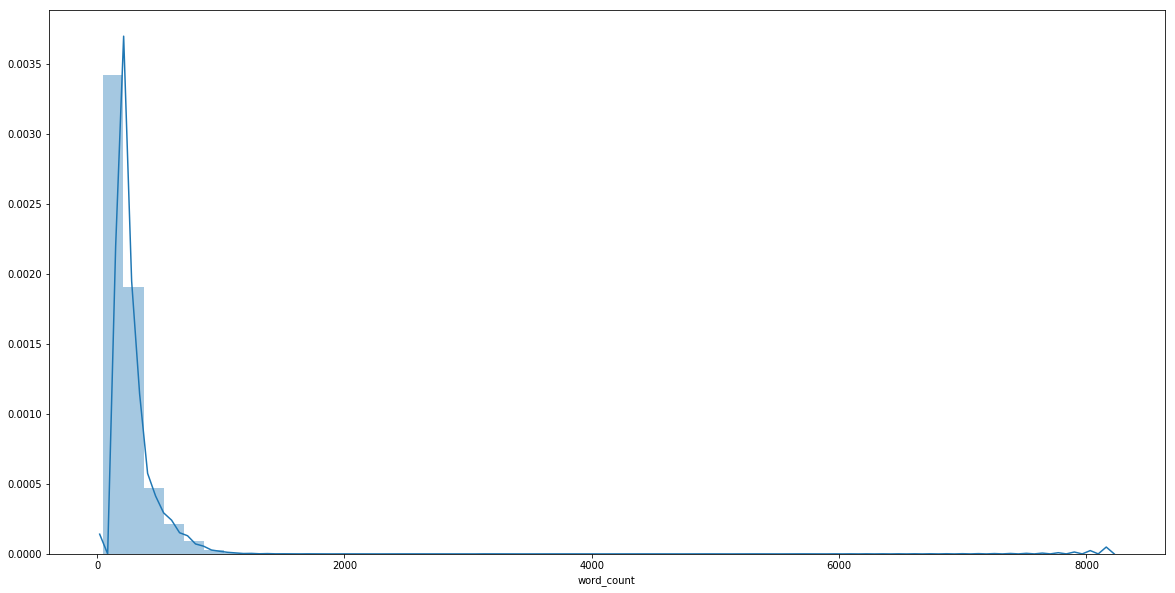

In [24]:
# check distribution of data set
plt.figure(figsize=(20,10))
sns.distplot(df["word_count"])
plt.show()

The word count is extremely skewed to the right.
Let's see what the lyrics are for some high word counts.

In [25]:
# display the top songs with more then 8000 words
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] > 8000])))
df.loc[df['word_count'] > 8000].head()

# of songs with 1 word: 1


,song,year,artist,genre,lyrics,word_count
18869,rap-monument,2014,flatbush-zombies,Hip-Hop,RAPROCK LIT POP NEWS COUNTRY R&B; HISTORY SPOR...,8195


In [26]:
# display the top songs with more then 5000 words
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] > 5000])))
df.loc[df['word_count'] > 5000].head()

# of songs with 1 word: 3


,song,year,artist,genre,lyrics,word_count
15620,yes-sir-i-will,2007,crass,Rock,"The door stands open - Across lines, invisible...",6232
18869,rap-monument,2014,flatbush-zombies,Hip-Hop,RAPROCK LIT POP NEWS COUNTRY R&B; HISTORY SPOR...,8195
89953,freestyle-june-27,2007,big-moe,Hip-Hop,"(Big Moe) Yeee-yeee haahee yeehaa, yeee-yaahee...",5085


In [27]:
# display the top songs with more then 1000 words
print("# of songs with 1 word: {}".format(len(df.loc[df['word_count'] > 1000])))
df.loc[df['word_count'] > 1000].head()

# of songs with 1 word: 572


,song,year,artist,genre,lyrics,word_count
95,get-me-bodied,2006,beyonce-knowles,Pop,"Nine, four, eight, one B day Mission one: I'm-...",1122
113,get-me-bodied-extended-remix-bonus-track,2006,beyonce-knowles,Pop,"Nine, four, eight, one B'day Mission one, Ima ...",1014
1590,tour-hip-hop-version,2006,capleton,Electronic,Yeah I say straighten yuh crooked ways Blessed...,1034
2339,burnt,2007,del-the-funky-homosapien,Hip-Hop,"DEL: Mista, twista, get ya every single time w...",1068
7464,stan,2006,dido,Pop,My tea's gone cold I'm wondering why I Got out...,1238


In [28]:
# check the proportion of songs with less 100 words compared to the entire data set
print("# of songs < 1000 words: {}".format(len(df[df['word_count'] > 1000])))
print("# of total songs: {}".format(len(df)))
print("% of songs < 1000 words: {}%".format(len(df[df['word_count'] > 1000])/len(df)*100))

# of songs < 1000 words: 572
# of total songs: 227180
% of songs < 1000 words: 0.2517827273527599%


Since there are only 0.25% of songs with 1000 words, let's eliminate them to simplify data set.

In [29]:
# delete songs with more than 1000 words
df = df[df['word_count'] < 1000]
# review data
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14203.0,188.170598,80.667305,51.0,130.0,172.0,231.0,895.0
Electronic,6989.0,217.124052,127.434446,51.0,126.0,190.0,273.0,990.0
Folk,2016.0,198.216766,98.313421,51.0,129.0,179.0,247.0,998.0
Hip-Hop,23735.0,489.282831,197.858712,51.0,350.0,487.0,623.0,999.0
Indie,3027.0,202.890320,100.437058,52.0,133.0,186.0,251.0,952.0
Jazz,7674.0,177.927287,93.729772,51.0,112.0,156.0,218.0,935.0
Metal,21590.0,183.510607,102.359617,51.0,114.0,161.0,225.0,999.0
Pop,39595.0,249.839576,123.408581,51.0,161.0,227.0,313.0,999.0
R&B,3348.0,227.329450,115.151365,52.0,144.0,205.0,282.0,892.0


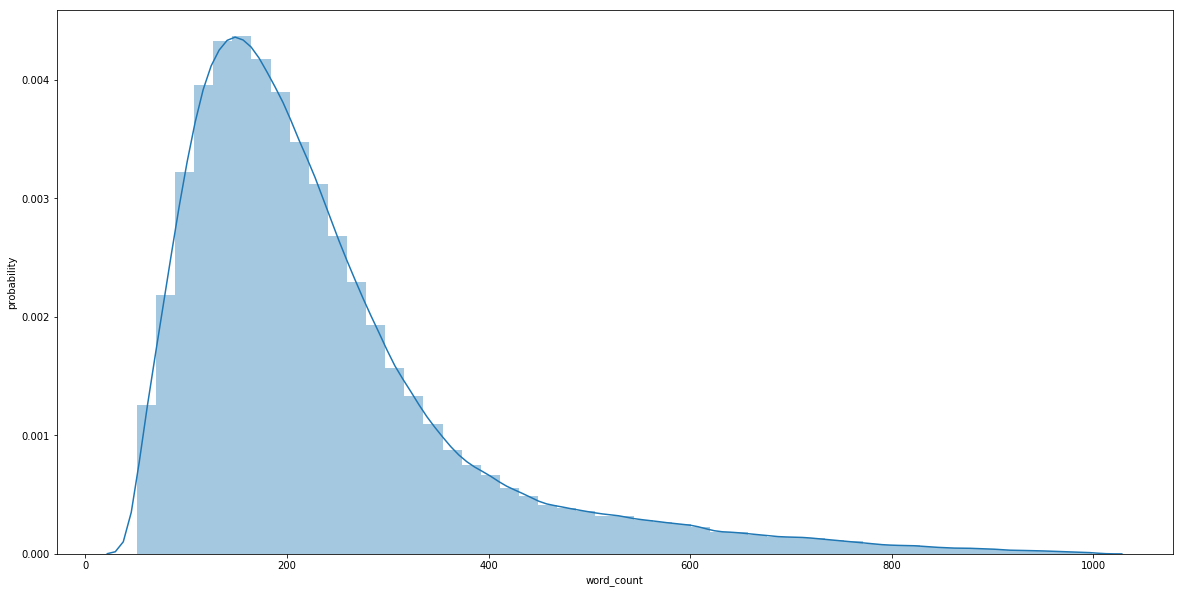

In [30]:
# check distribution of data set
plt.figure(figsize=(20,10))
sns.distplot(df["word_count"])
plt.ylabel("probability")
plt.show()

In [31]:
df['word_count'].describe()

count    226602.000000
mean        235.765995
std         146.228708
min          51.000000
25%         138.000000
50%         198.000000
75%         284.000000
max         999.000000
Name: word_count, dtype: float64

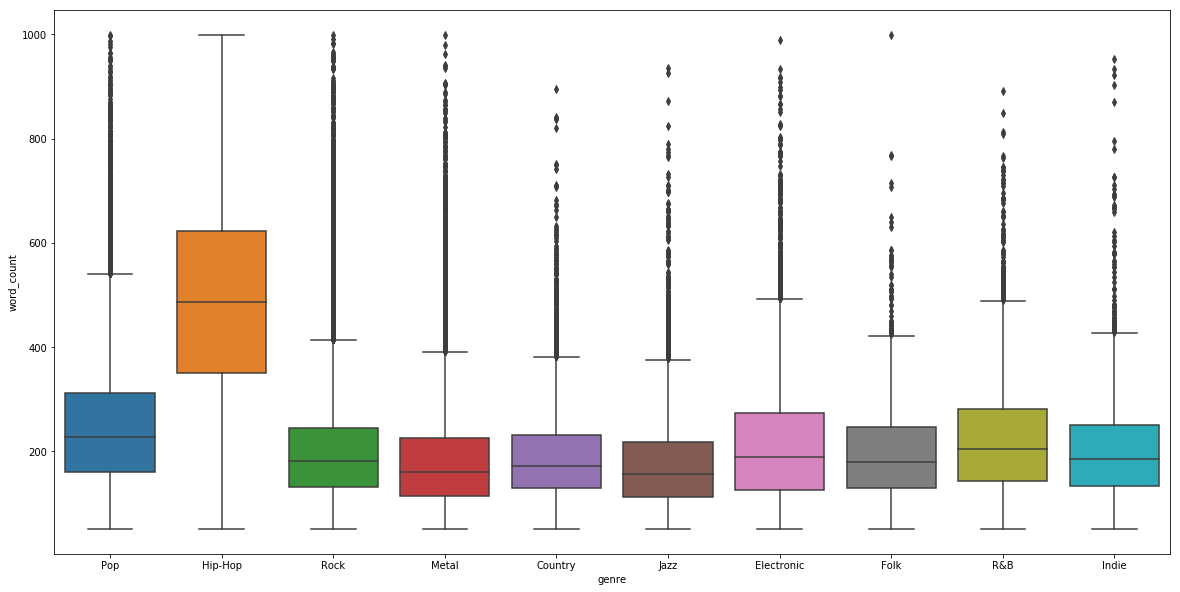

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x="genre", y="word_count", data=df)
plt.show()

In [33]:
# display panda info
df.info()
# check shape of data frame
print("# of rows: {}\n".format(df.shape[0]))
print("# of columns: {}\n".format(df.shape[1]))
# check how data is organized
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226602 entries, 0 to 362236
Data columns (total 6 columns):
song          226602 non-null object
year          226602 non-null int64
artist        226602 non-null object
genre         226602 non-null object
lyrics        226602 non-null object
word_count    226602 non-null int64
dtypes: int64(2), object(4)
memory usage: 22.1+ MB
# of rows: 226602

# of columns: 6



,song,year,artist,genre,lyrics,word_count
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",433
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",258
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,170
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",522
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312


### Word Frequency Counter

In [34]:
from collections import Counter

# Define pandas df 
# Target, Lowercase all, sepertate by space, split all of them into individual
words = (df['lyrics']
         .str.lower()
         .str.cat(sep=' ')
         .split())

# generate DF out of Counter -> counter counts most common values 
# create column word, frequency, set the rows as word
rslt = pd.DataFrame(Counter(words).most_common(),
                    columns=['Word', 'Frequency']).set_index('Word')


#rslt.to_csv("stopwords.csv")
# Print the result
print(rslt)

              Frequency
Word                   
the             1990099
i               1632246
you             1538061
to              1132930
and             1118241
a               1010786
me               701285
my               685989
in               653047
it               567813
of               548524
your             475443
that             447697
on               424812
i'm              415605
is               366968
all              362876
for              349213
be               334111
we               329689
so               298335
don't            289794
with             284072
but              280996
like             275781
no               258201
know             254789
this             253459
it's             251275
just             249571
...                 ...
1)]                   1
grim)                 1
redeemed)             1
unnegotiable          1
.kingdom,             1
"dr                   1
dee"                  1
albarn.               1
...said         

## Exploratory Data Analysis

### Sort Number of Songs by Year

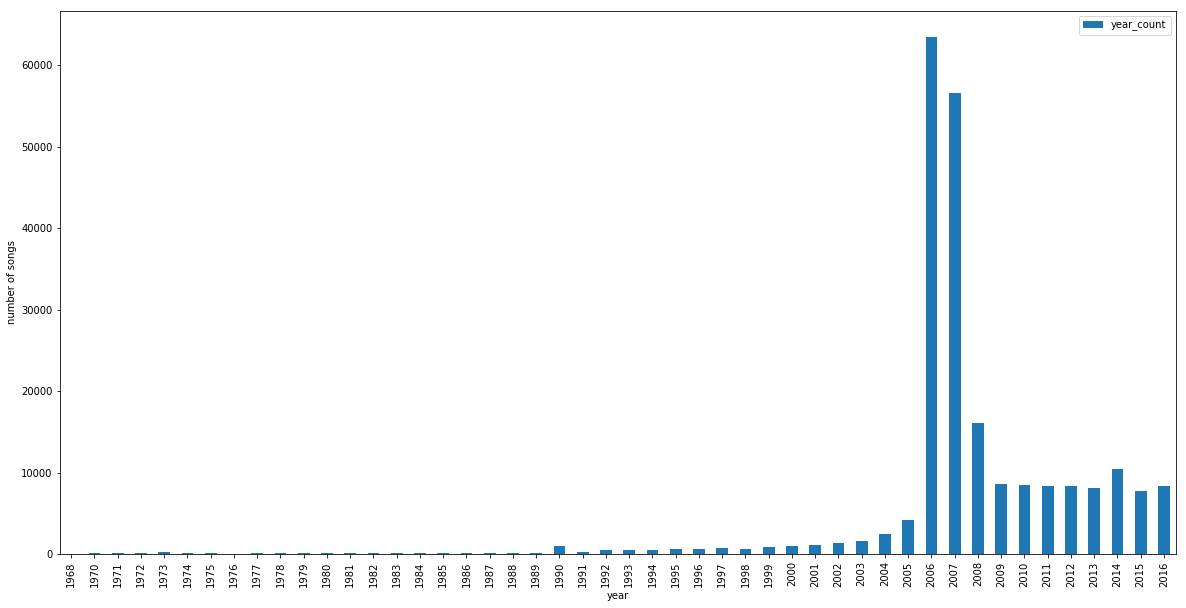

In [35]:
year_count = df.groupby(['year']).count()[['song']]
year_count.rename(columns={'song':'year_count'}, inplace=True)
year_count.plot(kind='bar', figsize=(20,10))
plt.ylabel('number of songs')
plt.show()

In [36]:
year_count.describe()

,year_count
count,48.000000
mean,4720.875000
std,12251.205666
min,1.000000
25%,168.500000
50%,528.000000
75%,2945.500000
max,63504.000000


In [37]:
year_count.sort_values(['year_count'], ascending=False).head()

,year_count
year,
2006,63504
2007,56590
2008,16068
2014,10477
2009,8609


In [38]:
year_count.sort_values(['year_count'], ascending=False).tail()

,year_count
year,
1983,135
1975,119
1987,109
1976,69
1968,1


In [39]:
year_ratio = year_count/year_count.sum()
year_ratio.rename(columns={'year_count':'year_ratio'}, inplace=True)
year_ratio.head()

,year_ratio
year,
1968,0.000004
1970,0.000631
1971,0.000772
1972,0.000750
1973,0.001002


In [40]:
year_ratio.tail()

,year_ratio
year,
2012,0.037158
2013,0.036072
2014,0.046235
2015,0.034148
2016,0.036884


### Sort Number of Songs by Genres

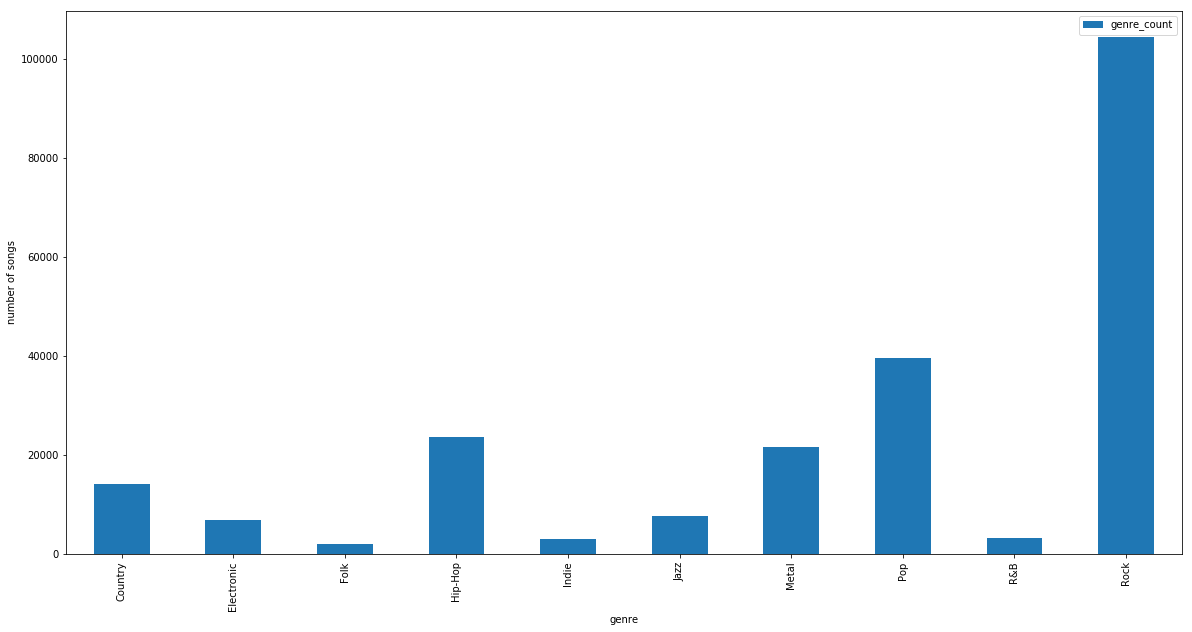

In [41]:
genre_count = df.groupby(['genre']).count()[['song']]
genre_count.rename(columns={'song':'genre_count'}, inplace=True)
genre_count.plot(kind='bar', figsize=(20,10))
plt.ylabel("number of songs")
plt.show()

In [42]:
genre_count.describe()

,genre_count
count,10.000000
mean,22660.200000
std,31092.825235
min,2016.000000
25%,4258.250000
50%,10938.500000
75%,23198.750000
max,104425.000000


In [43]:
genre_count.sort_values(['genre_count'], ascending=False)

,genre_count
genre,
Rock,104425
Pop,39595
Hip-Hop,23735
Metal,21590
Country,14203
Jazz,7674
Electronic,6989
R&B,3348
Indie,3027


In [44]:
genre_ratio = genre_count/genre_count.sum()
genre_ratio.rename(columns={'genre_count':'genre_ratio'}, inplace=True)
genre_ratio.sort_values(['genre_ratio'], ascending=False)

,genre_ratio
genre,
Rock,0.460830
Pop,0.174734
Hip-Hop,0.104743
Metal,0.095277
Country,0.062678
Jazz,0.033866
Electronic,0.030843
R&B,0.014775
Indie,0.013358


### Sort Number of Songs by Artists

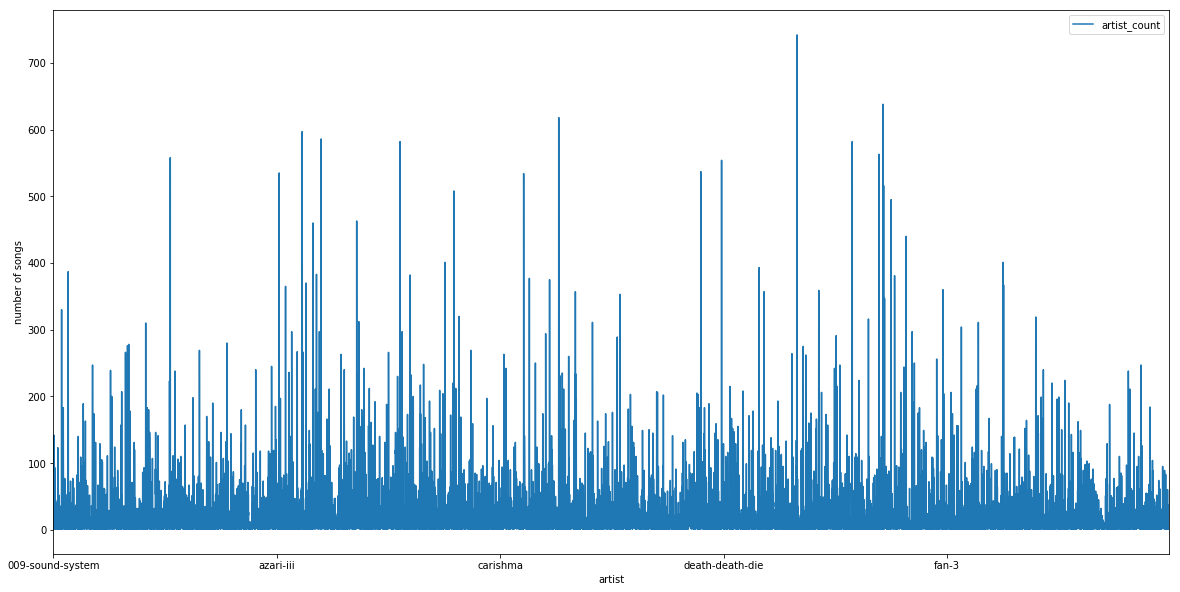

In [45]:
artist_count = df.groupby(['artist']).count()[['song']]
artist_count.rename(columns={'song':'artist_count'}, inplace=True)
artist_count.plot(figsize=(20,10))
plt.ylabel("number of songs")
plt.show()

In [46]:
artist_count.describe()

,artist_count
count,9993.000000
mean,22.676073
std,45.658802
min,1.000000
25%,2.000000
50%,8.000000
75%,24.000000
max,742.000000


In [47]:
artist_count.sort_values(['artist_count'], ascending=False).head()

,artist_count
artist,
dolly-parton,742
elton-john,638
chris-brown,618
barbra-streisand,597
bee-gees,586


In [48]:
artist_count.sort_values(['artist_count'], ascending=False).tail()

,artist_count
artist,
daoko,1
dare,1
dargoron,1
dari,1
the-great-flood-catastrophe,1


In [49]:
artist_ratio = artist_count/artist_count.sum()
artist_ratio.rename(columns={'arist_count':'artist_ratio'}, inplace=True)
artist_ratio.head()

,artist_count
artist,
009-sound-system,0.000018
047,0.000004
1-800-zombie,0.000009
10-cc,0.000627
10-years,0.000327


In [50]:
artist_ratio.tail()

,artist_count
artist,
the-graham-situation,0.000106
the-grand-magnolias,0.000004
the-grates,0.000018
the-graveyard-boulevard,0.000044
the-great-flood-catastrophe,0.000004


### Sort Genre by Emotions

#### Sort Genre by Fear using the phrase 'help me' as proxy

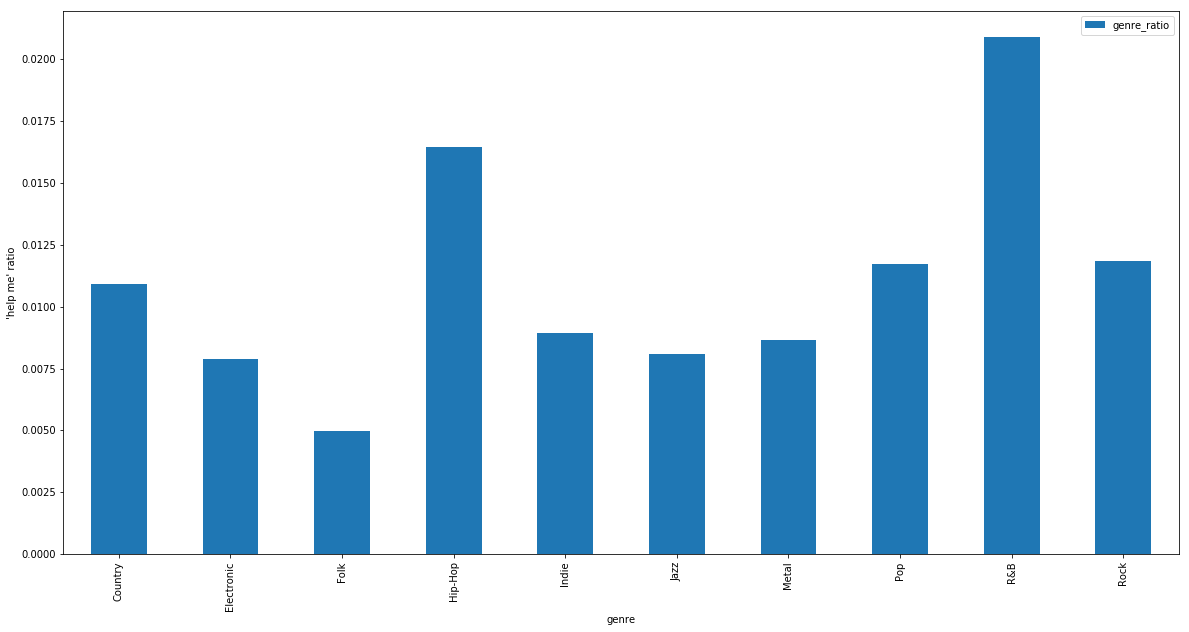

In [51]:
help_me_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('help me')].count()))
help_me_count.rename(columns={"lyrics":"genre_count"}, inplace=True)
help_me_ratio = help_me_count/genre_count
help_me_ratio.rename(columns={'genre_count': 'genre_ratio'}, inplace=True)
help_me_ratio.plot(kind="bar", figsize=(20,10))
plt.ylabel("'help me' ratio")
plt.show()

In [52]:
help_me_count.describe()

,genre_count
count,10.000000
mean,265.900000
std,374.986355
min,10.000000
25%,56.750000
50%,112.500000
75%,339.250000
max,1238.000000


In [53]:
help_me_count.sort_values(['genre_count'], ascending=False)

,genre_count
genre,
Rock,1238
Pop,465
Hip-Hop,390
Metal,187
Country,155
R&B,70
Jazz,62
Electronic,55
Indie,27


In [54]:
help_me_ratio.sort_values(['genre_ratio'], ascending=False)

,genre_ratio
genre,
R&B,0.020908
Hip-Hop,0.016431
Rock,0.011855
Pop,0.011744
Country,0.010913
Indie,0.008920
Metal,0.008661
Jazz,0.008079
Electronic,0.007870


#### Sort Genre by Anger using the word 'fuck' as proxy

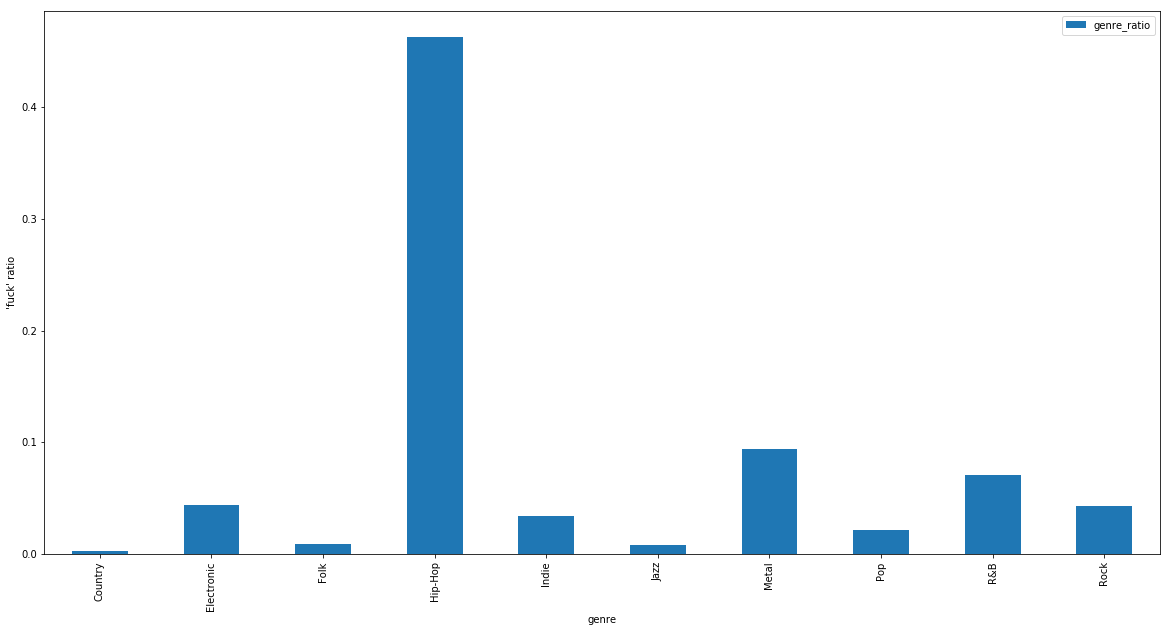

In [55]:
fuck_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('fuck')].count()))
fuck_count.rename(columns={"lyrics":"genre_count"}, inplace=True)
fuck_ratio = fuck_count/genre_count
fuck_ratio.rename(columns={'genre_count':'genre_ratio'}, inplace=True)
fuck_ratio.plot(kind="bar", figsize=(20,10))
plt.ylabel("'fuck' ratio")
plt.show()

In [56]:
fuck_count.describe()

,genre_count
count,10.000000
mean,1918.800000
std,3484.672527
min,19.000000
25%,76.250000
50%,273.500000
75%,1750.000000
max,10985.000000


In [57]:
fuck_count.sort_values(['genre_count'], ascending=False)

,genre_count
genre,
Hip-Hop,10985
Rock,4509
Metal,2042
Pop,874
Electronic,309
R&B,238
Indie,104
Jazz,67
Country,41


In [58]:
fuck_ratio.sort_values(['genre_ratio'], ascending=False)

,genre_ratio
genre,
Hip-Hop,0.462819
Metal,0.094581
R&B,0.071087
Electronic,0.044212
Rock,0.043179
Indie,0.034357
Pop,0.022073
Folk,0.009425
Jazz,0.008731


#### Sort Genre by Hate using the word 'hate' as proxy

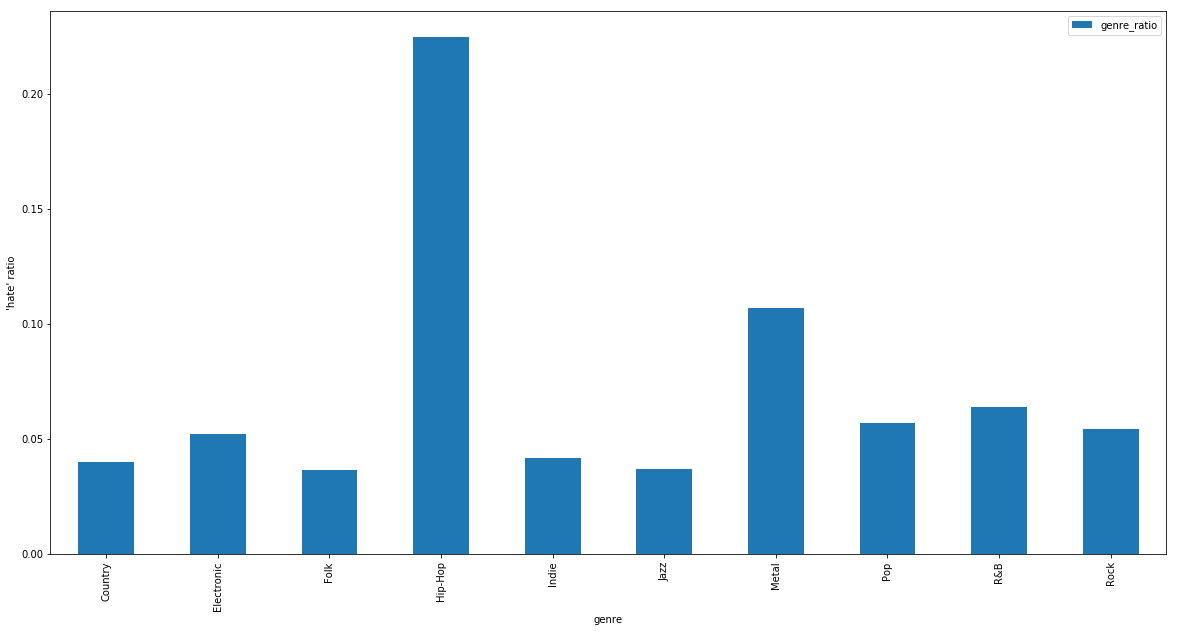

In [59]:
hate_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('hate')].count()))
hate_count.rename(columns={"lyrics":"genre_count"}, inplace=True)
hate_ratio = hate_count/genre_count
hate_ratio.rename(columns={'genre_count':'genre_ratio'}, inplace=True)
hate_ratio.plot(kind="bar", figsize=(20,10))
plt.ylabel("'hate' ratio")
plt.show()

In [60]:
hate_count.describe()

,genre_count
count,10.000000
mean,1725.900000
std,2170.972821
min,74.000000
25%,231.500000
50%,466.500000
75%,2302.000000
max,5709.000000


In [61]:
hate_count.sort_values(['genre_count'], ascending=False)

,genre_count
genre,
Rock,5709
Hip-Hop,5342
Metal,2316
Pop,2260
Country,569
Electronic,364
Jazz,284
R&B,214
Indie,127


In [62]:
hate_ratio.sort_values(['genre_ratio'], ascending=False)

,genre_ratio
genre,
Hip-Hop,0.225068
Metal,0.107272
R&B,0.063919
Pop,0.057078
Rock,0.054671
Electronic,0.052082
Indie,0.041956
Country,0.040062
Jazz,0.037008


#### Sort Genre by Sadness using the word 'sad' as proxy

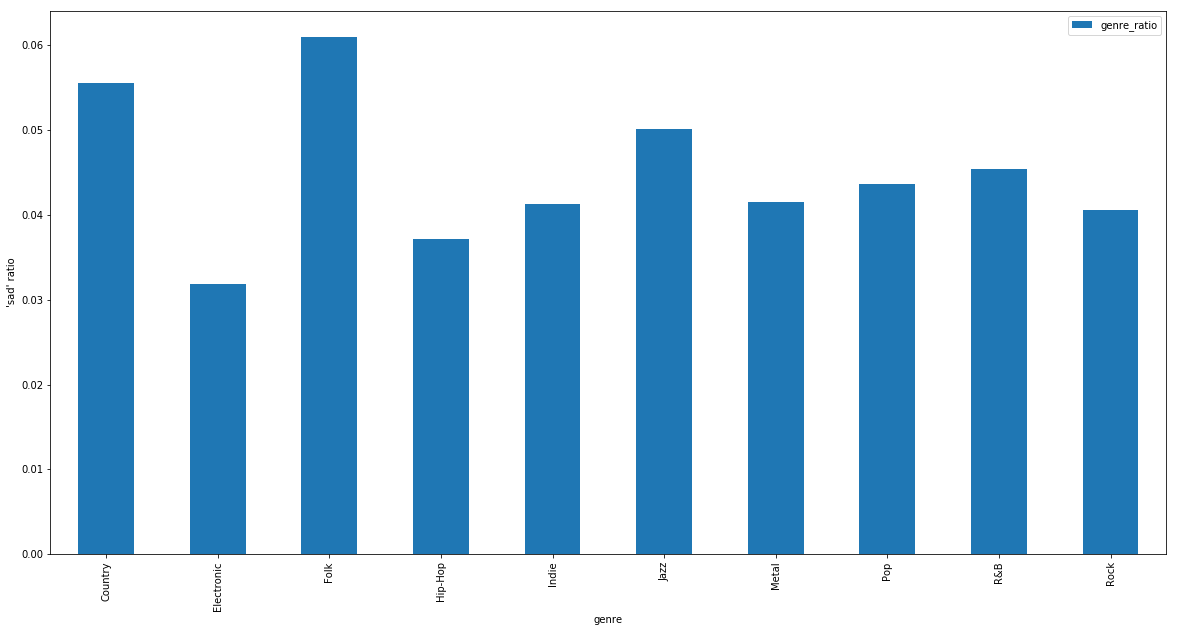

In [63]:
sad_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('sad')].count()))
sad_count.rename(columns={'lyrics':'genre_count'}, inplace=True)
sad_ratio = sad_count/genre_count
sad_ratio.rename(columns={'genre_count':'genre_ratio'}, inplace=True)
sad_ratio.plot(kind="bar", figsize=(20,10))
plt.ylabel("'sad' ratio")
plt.show()

In [64]:
sad_count.describe()

,genre_count
count,10.000000
mean,953.800000
std,1259.729495
min,123.000000
25%,169.750000
50%,587.000000
75%,892.750000
max,4236.000000


In [65]:
sad_count.sort_values(['genre_count'], ascending=False)

,genre_count
genre,
Rock,4236
Pop,1726
Metal,896
Hip-Hop,883
Country,789
Jazz,385
Electronic,223
R&B,152
Indie,125


In [66]:
sad_ratio.sort_values(['genre_ratio'], ascending=False)

,genre_ratio
genre,
Folk,0.061012
Country,0.055552
Jazz,0.050169
R&B,0.045400
Pop,0.043591
Metal,0.041501
Indie,0.041295
Rock,0.040565
Hip-Hop,0.037202


#### Sort Genres by Happiness using the word 'happy' as proxy

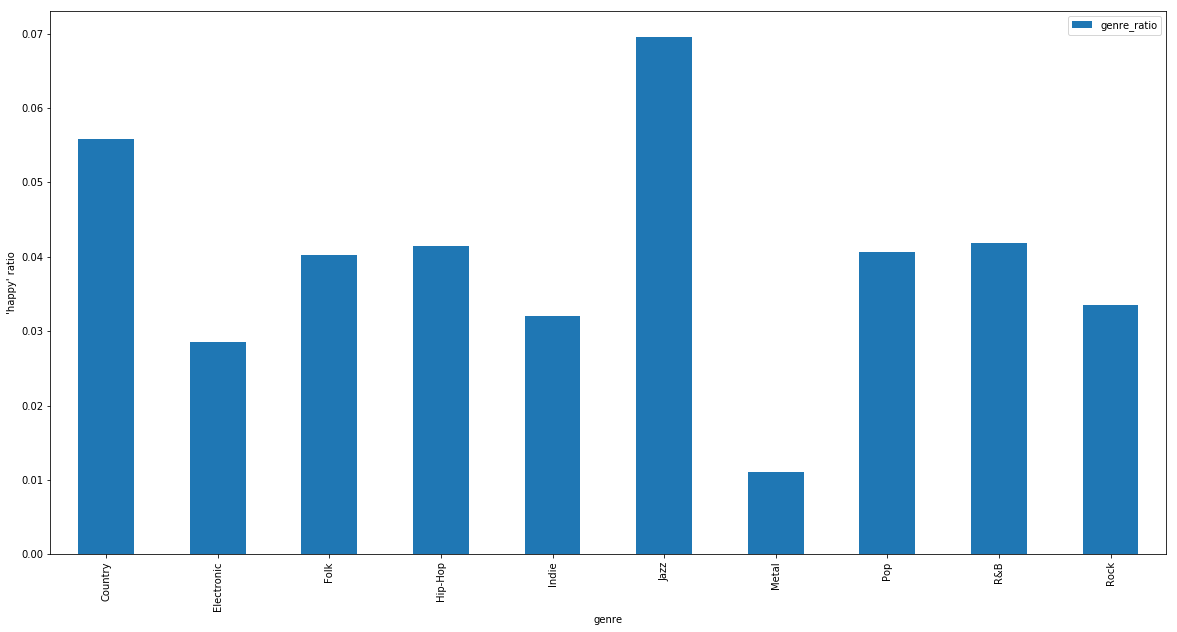

In [67]:
happy_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('happy')].count()))
happy_count.rename(columns={"lyrics":"genre_count"}, inplace=True)
happy_ratio = happy_count/genre_count
happy_ratio.rename(columns={'genre_count':'genre_ratio'}, inplace=True)
happy_ratio.plot(kind="bar", figsize=(20,10))
plt.ylabel("'happy' ratio")
plt.show()

In [68]:
happy_count.describe()

,genre_count
count,10.00000
mean,817.30000
std,1063.12684
min,81.00000
25%,154.75000
50%,386.00000
75%,936.00000
max,3501.00000


In [69]:
happy_count.sort_values(['genre_count'], ascending=False)

,genre_count
genre,
Rock,3501
Pop,1607
Hip-Hop,984
Country,792
Jazz,534
Metal,238
Electronic,199
R&B,140
Indie,97


In [70]:
happy_ratio.sort_values(['genre_ratio'], ascending=False)

,genre_ratio
genre,
Jazz,0.069586
Country,0.055763
R&B,0.041816
Hip-Hop,0.041458
Pop,0.040586
Folk,0.040179
Rock,0.033526
Indie,0.032045
Electronic,0.028473


#### Sort Genres by Love using the word 'love' as proxy

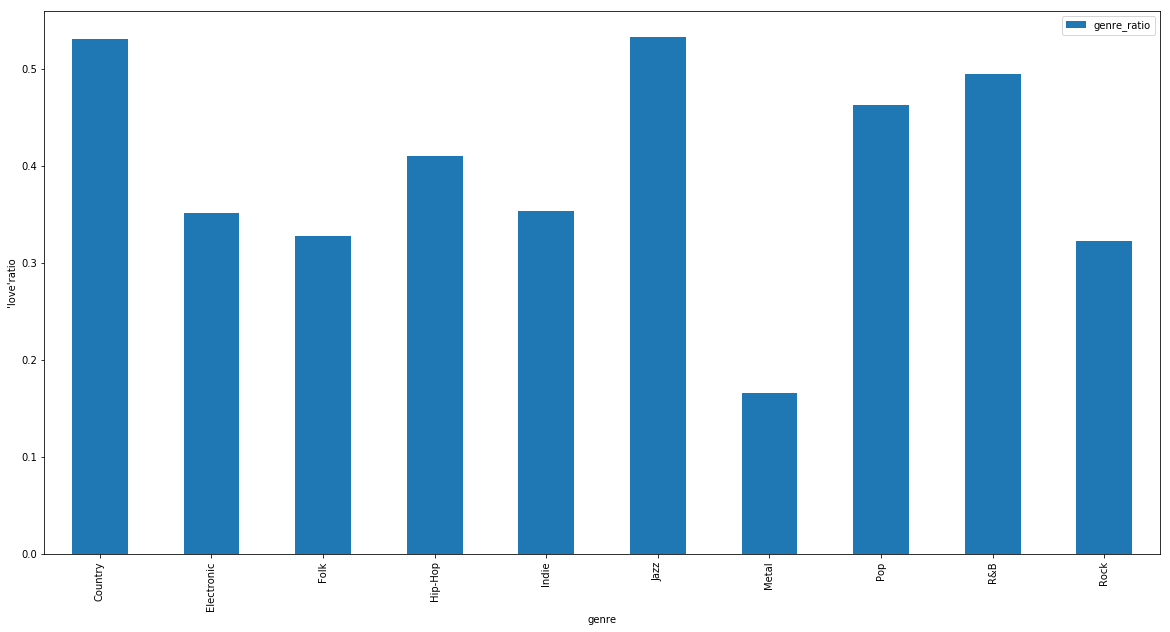

In [71]:
love_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('love')].count()))
love_count.rename(columns={"lyrics":"genre_count"}, inplace=True)
love_ratio = love_count/genre_count
love_ratio.rename(columns={'genre_count':'genre_ratio'}, inplace=True)
love_ratio.plot(kind="bar", figsize=(20,10))
plt.ylabel("'love'ratio")
plt.show()

In [72]:
love_count.describe()

,genre_count
count,10.000000
mean,8285.600000
std,10424.214643
min,661.000000
25%,1857.750000
50%,3843.000000
75%,9184.750000
max,33714.000000


In [73]:
love_count.sort_values(['genre_count'], ascending=False)

,genre_count
genre,
Rock,33714
Pop,18338
Hip-Hop,9735
Country,7534
Jazz,4092
Metal,3594
Electronic,2460
R&B,1657
Indie,1071


In [74]:
love_ratio.sort_values(['genre_ratio'], ascending=False)

,genre_ratio
genre,
Jazz,0.533229
Country,0.530451
R&B,0.494922
Pop,0.463139
Hip-Hop,0.410154
Indie,0.353816
Electronic,0.351982
Folk,0.327877
Rock,0.322854


#### Sort Genres by Pity using the word 'sorry' as proxy

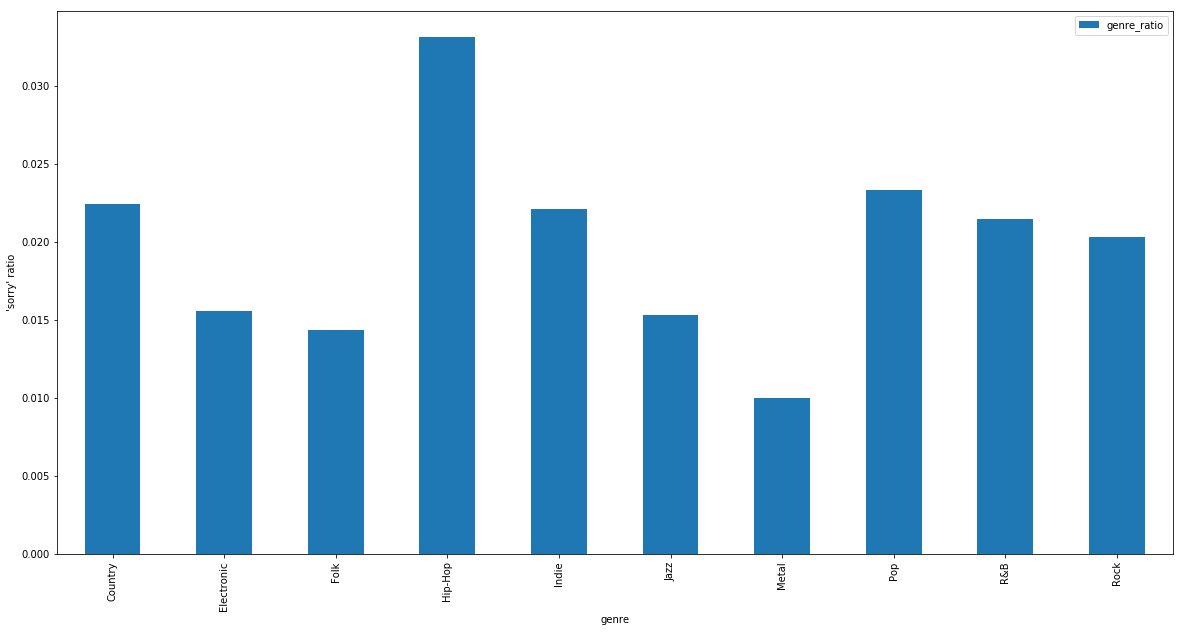

In [75]:
sorry_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('sorry')].count()))
sorry_count.rename(columns={"lyrics":"genre_count"}, inplace=True)
sorry_ratio = sorry_count/genre_count
sorry_ratio.rename(columns={'genre_count':'genre_ratio'}, inplace=True)
sorry_ratio.plot(kind="bar", figsize=(20,10))
plt.ylabel("'sorry' ratio")
plt.show()

In [76]:
sorry_count.describe()

,genre_count
count,10.000000
mean,476.700000
std,658.182354
min,29.000000
25%,81.250000
50%,167.500000
75%,670.750000
max,2124.000000


In [77]:
sorry_count.sort_values(['genre_count'], ascending=False)

,genre_count
genre,
Rock,2124
Pop,924
Hip-Hop,788
Country,319
Metal,217
Jazz,118
Electronic,109
R&B,72
Indie,67


In [78]:
sorry_ratio.sort_values(['genre_ratio'], ascending=False)

,genre_ratio
genre,
Hip-Hop,0.033200
Pop,0.023336
Country,0.022460
Indie,0.022134
R&B,0.021505
Rock,0.020340
Electronic,0.015596
Jazz,0.015377
Folk,0.014385


#### Sort Genres by Religiousness using the word 'Jesus' as a proxy

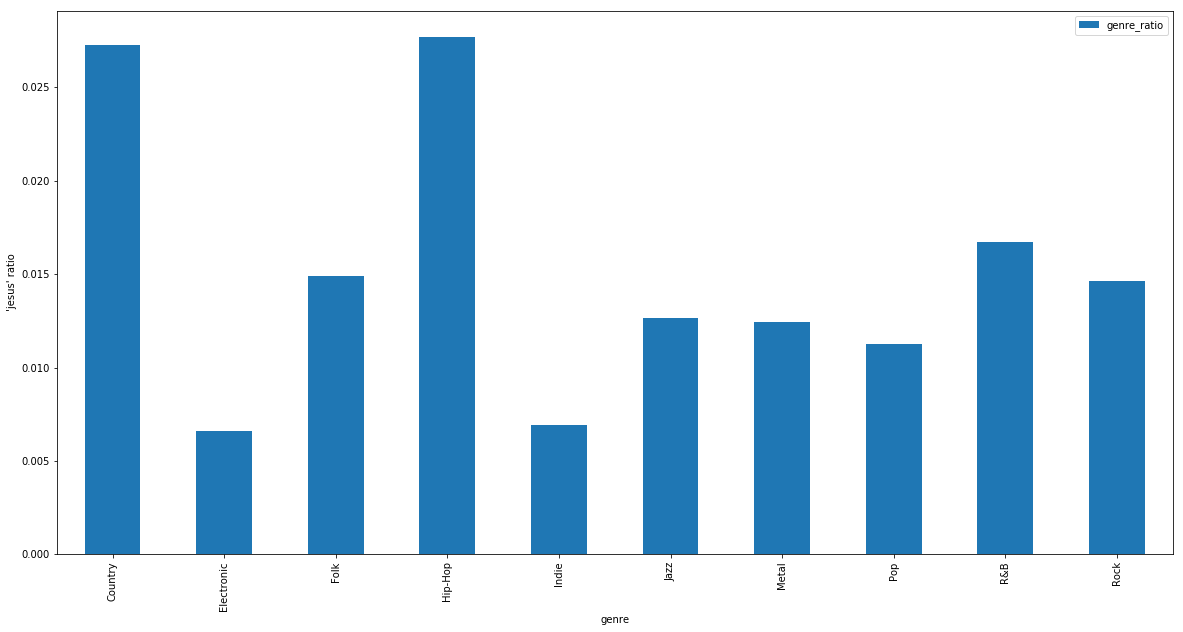

In [79]:
jesus_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('Jesus')].count()))
jesus_count.rename(columns={"lyrics":"genre_count"}, inplace=True)
jesus_ratio = jesus_count/genre_count
jesus_ratio.rename(columns={"genre_count":"genre_ratio"}, inplace=True)
jesus_ratio.plot(kind="bar", figsize=(20,10))
plt.ylabel("'jesus' ratio")
plt.show()

In [80]:
jesus_count.describe()

,genre_count
count,10.000000
mean,353.900000
std,466.419327
min,21.000000
25%,48.500000
50%,182.500000
75%,431.250000
max,1530.000000


In [81]:
jesus_count.sort_values(['genre_count'], ascending=False)

,genre_count
genre,
Rock,1530
Hip-Hop,658
Pop,446
Country,387
Metal,268
Jazz,97
R&B,56
Electronic,46
Folk,30


In [82]:
jesus_ratio.sort_values(['genre_ratio'], ascending=False)

,genre_ratio
genre,
Hip-Hop,0.027723
Country,0.027248
R&B,0.016726
Folk,0.014881
Rock,0.014652
Jazz,0.012640
Metal,0.012413
Pop,0.011264
Indie,0.006938


#### Sort Genres by Securalism using the word 'science' as proxy

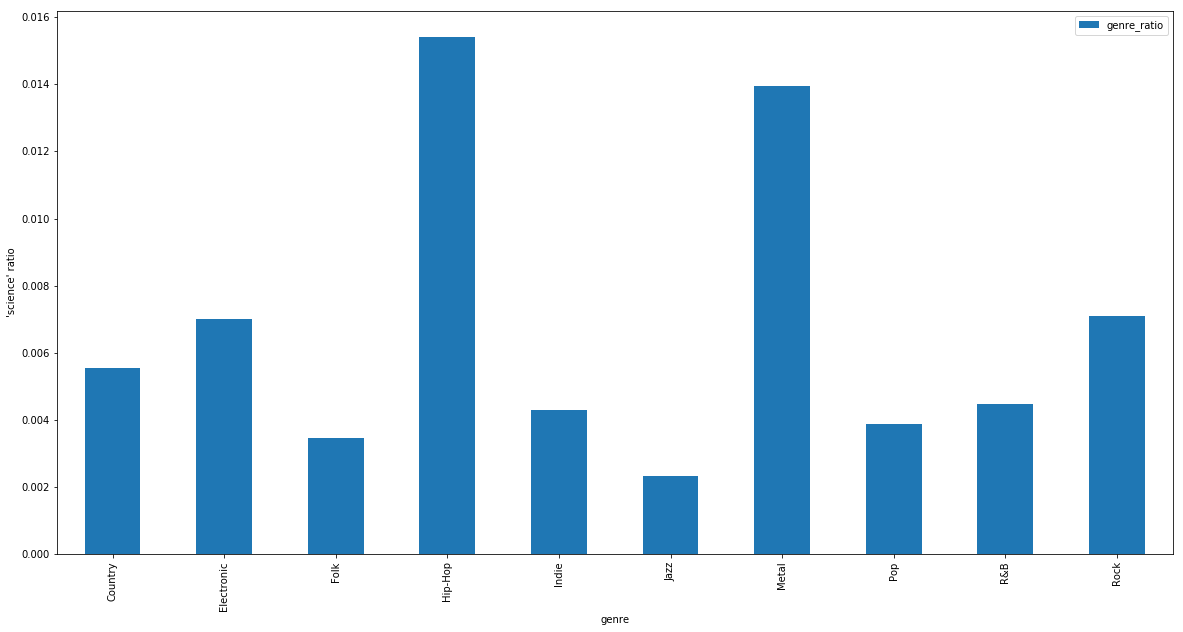

In [83]:
science_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('science')].count()))
science_count.rename(columns={"lyrics":"genre_count"}, inplace=True)
science_ratio = science_count/genre_count
science_ratio.rename(columns={"genre_count":"genre_ratio"}, inplace=True)
science_ratio.plot(kind="bar", figsize=(20,10))
plt.ylabel("'science' ratio")
plt.show()

In [84]:
science_count.describe()

,genre_count
count,10.000000
mean,174.300000
std,236.398463
min,7.000000
25%,15.750000
50%,64.000000
75%,264.250000
max,741.000000


In [85]:
science_count.sort_values(['genre_count'], ascending=False)

,genre_count
genre,
Rock,741
Hip-Hop,366
Metal,301
Pop,154
Country,79
Electronic,49
Jazz,18
R&B,15
Indie,13


In [86]:
science_ratio.sort_values(['genre_ratio'], ascending=False)

,genre_ratio
genre,
Hip-Hop,0.015420
Metal,0.013942
Rock,0.007096
Electronic,0.007011
Country,0.005562
R&B,0.004480
Indie,0.004295
Pop,0.003889
Folk,0.003472


#### Sort Genres by Alcoholism using the word 'beer' as proxy

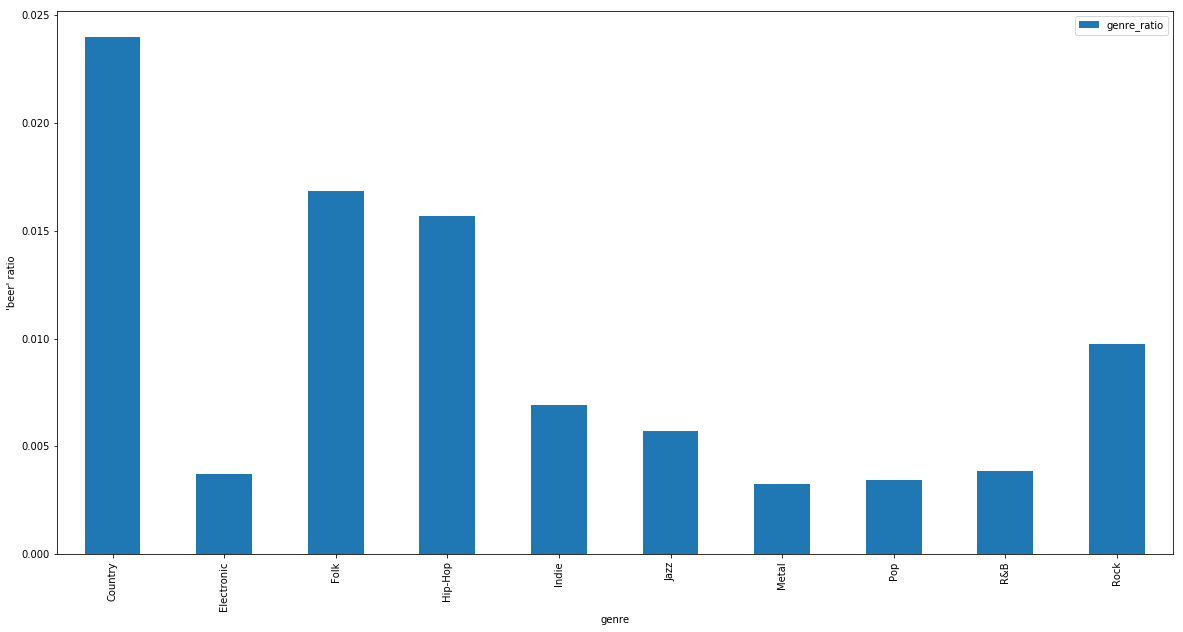

In [87]:
beer_count = pd.DataFrame(df.groupby(['genre'])['lyrics'].apply(lambda x: x[x.str.contains('beer')].count()))
beer_count.rename(columns={"lyrics":"genre_count"}, inplace=True)
beer_ratio = beer_count/genre_count
beer_ratio.rename(columns={"genre_count":"genre_ratio"}, inplace=True)
beer_ratio.plot(kind="bar", figsize=(20,10))
plt.ylabel("'beer' ratio")
plt.show()

In [88]:
beer_count.describe()

,genre_count
count,10.000000
mean,207.600000
std,314.122835
min,13.000000
25%,28.000000
50%,57.000000
75%,290.000000
max,1018.000000


In [89]:
beer_count.sort_values(['genre_count'], ascending=False)

,genre_count
genre,
Rock,1018
Hip-Hop,372
Country,341
Pop,137
Metal,70
Jazz,44
Folk,34
Electronic,26
Indie,21


In [90]:
beer_ratio.sort_values(['genre_ratio'], ascending=False)

,genre_ratio
genre,
Country,0.024009
Folk,0.016865
Hip-Hop,0.015673
Rock,0.009749
Indie,0.006938
Jazz,0.005734
R&B,0.003883
Electronic,0.003720
Pop,0.003460


In [91]:
counts = genre_count.copy()
counts['fuck_count'] = fuck_count
#counts['hate_count'] = hate_count
counts['sad_count'] = sad_count
counts['happy_count'] = happy_count
counts['love_count'] = love_count
#counts['sorry_count'] = sorry_count
counts['jesus_count'] = jesus_count
counts['science_count'] = science_count
counts['beer_count'] = beer_count
counts

,genre_count,fuck_count,sad_count,happy_count,love_count,jesus_count,science_count,beer_count
genre,,,,,,,,
Country,14203,41,789,792,7534,387,79,341
Electronic,6989,309,223,199,2460,46,49,26
Folk,2016,19,123,81,661,30,7,34
Hip-Hop,23735,10985,883,984,9735,658,366,372
Indie,3027,104,125,97,1071,21,13,21
Jazz,7674,67,385,534,4092,97,18,44
Metal,21590,2042,896,238,3594,268,301,70
Pop,39595,874,1726,1607,18338,446,154,137
R&B,3348,238,152,140,1657,56,15,13


In [92]:
ratios = genre_ratio.copy()
ratios['help_me_ratio'] = help_me_ratio
ratios['fuck_ratio'] = fuck_ratio
#ratios['hate_ratio'] = hate_ratio
ratios['sad_ratio'] = sad_ratio
ratios['happy_ratio'] = happy_ratio
ratios['love_ratio'] = love_ratio
#ratios['sorry_ratio'] = sorry_ratio
ratios['jesus_ratio'] = jesus_ratio
ratios['science_ratio'] = science_ratio
ratios['beer_ratio'] = beer_ratio
ratios

,genre_ratio,help_me_ratio,fuck_ratio,sad_ratio,happy_ratio,love_ratio,jesus_ratio,science_ratio,beer_ratio
genre,,,,,,,,,
Country,0.062678,0.010913,0.002887,0.055552,0.055763,0.530451,0.027248,0.005562,0.024009
Electronic,0.030843,0.007870,0.044212,0.031907,0.028473,0.351982,0.006582,0.007011,0.003720
Folk,0.008897,0.004960,0.009425,0.061012,0.040179,0.327877,0.014881,0.003472,0.016865
Hip-Hop,0.104743,0.016431,0.462819,0.037202,0.041458,0.410154,0.027723,0.015420,0.015673
Indie,0.013358,0.008920,0.034357,0.041295,0.032045,0.353816,0.006938,0.004295,0.006938
Jazz,0.033866,0.008079,0.008731,0.050169,0.069586,0.533229,0.012640,0.002346,0.005734
Metal,0.095277,0.008661,0.094581,0.041501,0.011024,0.166466,0.012413,0.013942,0.003242
Pop,0.174734,0.011744,0.022073,0.043591,0.040586,0.463139,0.011264,0.003889,0.003460
R&B,0.014775,0.020908,0.071087,0.045400,0.041816,0.494922,0.016726,0.004480,0.003883
